In [35]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scnets as scn
import h5py
from sklearn.model_selection import train_test_split
#import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
#currently installed theme will be used to
#set plot style if no arguments provided
jtplot.reset()
#jtplot.style(theme='grade3')

h5f = h5py.File('./D10k.h5','r')
X = h5f['sizes'][:]
Y = h5f['spectrum'][:]
#P = h5f['physics'][:]
X = (X - 10.0) / 90.0
X = 2*(X - 0.1)/(0.9) - 1.0
#XP = np.concatenate((X,P), axis=1)
#create a phys based x and a normal x
Sz = 10000
#create a train - test split of the dataset
#xp_train, xp_test, y_train, y_test = train_test_split(XP[:Sz], Y[:Sz], test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(X[:Sz], Y[:Sz], test_size=0.2)








In [ ]:
model_s = scn.fullycon(in_size=16, 
                     out_size=64, 
                     batch_size=64,
                     N_hidden=1, 
                     N_neurons=128, 
                     N_gpus=1)

model_m = scn.fullycon(in_size=16, 
                     out_size=64, 
                     batch_size=64,
                     N_hidden=2, 
                     N_neurons=128, 
                     N_gpus=1)

model_h = scn.fullycon(in_size=16, 
                     out_size=64, 
                     batch_size=64,
                     N_hidden=3, 
                     N_neurons=128, 
                     N_gpus=1)

#model_s.load_weights('sm_32k.h5')
#model_s.load_weights('ssim_32k_05.h5')
#model_s.load_weights('ss_32k_050.h5')

#model_m.load_weights('mm_64k.h5')
#model_m.load_weights('ssim_64k_05.h5')
#model_m.load_weights('ms_64k_050.h5')

#model_h.load_weights('ssim_128k_05.h5')
#model_h.load_weights('hm_32k.h5')
#model_h.load_weights('ssim_320k_05.h5')
model_h.load_weights('hs_8k.h5')







In [53]:
import de_online as deo
import fobj as fo
import diversipy as hycu
import scnets as scn
import de_runner as runde
import time

!rm -rf *.dat

num_isles = 1
num_layers_i = 16 
num_gens  = 1
popsize = 80


start_time= time.time()
pulist = runde.lhs_initializer(num_isles = num_isles, D = num_layers_i, num_gens  = num_gens, popsize = popsize)


evalcnt = 0
#x_train, x_test, y_train, y_test = train_test_split(X[:Sz], Y[:Sz], test_size=0.2)
bids, bests, bfits, hstry_ac,nfunc=deo.de_plain(
        fobj=fo.calc_fits,  # objective function, serial eval
        fsec=fo.arc_par,
        num_layers_i=num_layers_i,
        num_isles = num_isles, #number of islands
        num_gens =num_gens,
        poplist=pulist,  # already initialized population
        mut=0.4,  # mutation rate
        crossp=0.4,  # crossover
        lenp=0.0,
        lins = 0.0,
        popsize=popsize,  # the population size
        its=32, # the number of iterations needed to run for
        verbose=1,
        lam_low=400, 
        lam_high=800, 
        lam_pts=64)
evalcnt+=nfunc

print("time:" + str((time.time() - start_time)/60.0))


x_train = np.loadtxt('xtapp.dat')
y_train = np.loadtxt('ytapp.dat')
xt = np.split(x_train, num_isles)    
yt = np.split(y_train, num_isles)    
for isl in range(num_isles):
    namef = "xtapp"+str(isl)+".dat"
    rawxi = open(namef, "a") # or "wb"
    np.savetxt(rawxi, xt[isl])
    rawxi.close()
    namef = "ytapp"+str(isl)+".dat"
    rawyi = open(namef, "a") # or "wb"
    np.savetxt(rawyi, yt[isl])
    rawyi.close()



for ind in range(7):    
    modelsi = runde.run_onde(num_isles)
    print("time:" + str((time.time() - start_time)/60.0))
    bids, bests, bfits, hstry_ac,nfunc, errlist = deo.de_isl_online(
        fobj=fo.calc_fits,  # objective function, serial eval
        fobj_mx=fo.arc_par_gp,
        fsec=fo.arc_par,
        mx_model=modelsi,
        num_layers_i=num_layers_i,
        num_isles = num_isles, #number of islands
        num_gens =num_gens,
        poplist=pulist,  # already initialized population
        mut=0.4,  # mutation rate
        crossp=0.4,  # crossover
        lenp=0.0,
        lins = 0.0,
        popsize=popsize,  # the population size
        its=32, # the number of iterations needed to run for
        verbose=1,
        lam_low=400, 
        lam_high=800, 
        lam_pts=64)
    print("time:" + str((time.time() - start_time)/60.0))
# #print(errlist)
    evalcnt += nfunc

# xtop = np.loadtxt('xtapp.dat')
# ytop = np.loadtxt('ytapp.dat')
# x_train = np.concatenate((x_train, xtop))
# y_train = np.concatenate((y_train, ytop))



# # #        model_h.save_weights("hs_8k.h5")

# #     #print(rndtop5(d_min + (d_max - d_min)*bests[np.argmin(bfits)]))
# #     #print(np.sum(rndtop5(d_min + (d_max - d_min)*bests[np.argmin(bfits)])))
print(bfits, evalcnt)


TypeError: de_plain() missing 2 required positional arguments: 'xfname' and 'yfname'

In [ ]:
bfits

In [24]:
import de2 as de
import de_online as deo
import fobj as fo
import diversipy as hycu
import scnets as scn
import de_runner as runde
import time

num_isles = 10
num_layers_i = 16 
num_gens  = 1
popsize = 160
for i in range(1):
     
    init_seed = 0
    init_seed_e = int(init_seed/num_isles)
    rand_gens = num_isles*popsize - init_seed
    rand_gens_e = rand_gens/num_isles
    strat = hycu.stratify_generalized(dimension=num_layers_i, num_strata=rand_gens)
    pts = hycu.stratified_sampling(strat)
    # item = 0
    # for sol in final:
    #     pts[int(item/4)*popsize + item%4] = sol
    #     item+=1
    spl1 = np.split(pts, num_isles)

    pulist = []
    for isl in range(num_isles):
        pulist.append( [x.flatten() for x in  np.split(spl1[isl], popsize)] )
        
    bids, bests, bfits, hstry_ac,nfunc = de.de_isl(
        fobj=fo.calc_fits,  # objective function, serial eval
        num_layers_i=num_layers_i,
        num_isles = num_isles, #number of islands
        num_gens =num_gens,
        poplist=pulist,  # already initialized population
        mut=0.8,  # mutation rate
        crossp=0.7,  # crossover
        lenp=0.0,
        lins = 0.0,
        popsize=popsize,  # the population size
        its=256, # the number of iterations needed to run for
        verbose=0,
        lam_low=400, 
        lam_high=800, 
        lam_pts=64)
# print(rndtop5(d_min + (d_max - d_min)*bests[np.argmin(bfits)]))
# print(np.sum(rndtop5(d_min + (d_max - d_min)*bests[np.argmin(bfits)])))
    print(bfits)

Using TensorFlow backend.
/home/hegder/anaconda3/envs/dlm/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hegder/anaconda3/envs/dlm/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hegder/anaconda3/envs/dlm/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hegder/anaconda3/envs/d

Epoch #:1
 19 -- 11.773  8.962  7.927  11.377  10.295  9.965  13.405  11.665  7.496  14.645  
 39 -- 7.887  6.478  7.136  7.859  10.295  6.958  12.046  7.919  5.639  12.880  
 59 -- 6.429  4.785  6.001  7.857  7.593  6.958  10.857  5.852  4.571  12.005  
 79 -- 5.553  4.617  5.427  6.580  7.593  6.958  9.126  5.173  3.979  8.633  
 99 -- 5.447  4.438  4.783  6.247  7.593  6.958  9.126  4.824  3.821  8.633  
119 -- 5.145  4.337  4.195  6.247  7.438  6.958  8.055  4.770  3.717  8.633  
139 -- 4.649  4.282  4.195  4.811  7.117  6.078  8.055  4.733  3.679  6.841  
159 -- 4.649  4.278  4.064  4.811  6.143  5.947  7.277  4.719  3.635  6.841  
179 -- 4.370  4.275  3.902  4.811  6.143  5.947  6.743  4.716  3.634  6.841  
199 -- 4.342  4.274  3.793  4.811  5.224  5.947  6.644  4.715  3.611  6.841  
219 -- 4.342  4.273  3.733  4.811  5.224  5.947  5.294  4.712  3.610  6.841  
239 -- 4.342  4.273  3.607  4.811  5.224  5.947  4.500  4.709  3.607  6.841  
Num func evals:  411200
[4.24244664 4.27228

In [25]:

print(fo.rndtop5(10.0 + (90.0)*bests[np.argmin(bfits)]))

[ 66.   76.   85.   10.   24.   51.5  10.   10.  100.   83.   86.5  86.5
 100.   94.   48.   96.5]


In [ ]:


D_up = 100.0
x_l = 0.1
x_h = 1.0
D_low = D_up*x_l
num_lams = 64


def de_surrogate(model, fobj, num_isles, popsize, num_layers, x_low, x_high, mut_p = 0.8, cross_p=0.7, num_its = 100 ):
    
    shft = np.transpose(popsize*np.tile(np.arange(num_isles), (popsize,1)))
    
    shifts = np.array(shft.flatten(), dtype='int32')
    bfits = np.zeros(num_isles)
    
    binds = np.zeros(num_isles, dtype='int32')
    bests = np.zeros((num_isles, num_layers))
    pop = np.random.uniform( low=x_low, high=x_high, size=(num_isles*popsize, num_layers ))
    fit = fobj(modelg=model,   pop=pop, x_low=x_low, x_hig=x_high)
    
    
    
    for isl in range(num_isles):
        bfits[isl] = np.min(fit[isl*popsize: (isl+1)*popsize], axis=0)
        binds[isl] = np.argmin(fit[isl*popsize: (isl+1)*popsize], axis=0)
        bests[isl] = pop[ isl*popsize +  binds[isl] ]
        
        
        
    
    
    for its in range(num_its):
        #print(its)
        a_arr = np.reshape( np.tile(bests, (1,popsize)), (num_isles*popsize, num_layers) )
        b_arr = shifts + np.random.randint(0, popsize, num_isles*popsize)
        c_arr = shifts + np.random.randint(0, popsize, num_isles*popsize)
        mutpop = np.clip(a_arr + mut_p*(pop[b_arr] - pop[c_arr]), x_low, 1)
        
       

        crossp = np.random.uniform( low=0.0, high=1.0, size=(num_isles*popsize, num_layers ))
        trial = np.where(crossp <= cross_p, mutpop, pop)
        
        fit_t = fobj(modelg=model,   pop=trial, x_low=x_low, x_hig=x_high)
        for ind, val in enumerate(fit_t < fit):
            if val == True:
                pop[ind] = trial[ind]
                fit[ind] = fit_t[ind]
            
        
#         pop = np.where( fit_t < fit, trial, pop)
#         fit = np.where( fit_t < fit, fit_t, fit)
        for isl in range(num_isles):
            bfits[isl] = np.min(fit[isl*popsize: (isl+1)*popsize] )
            binds[isl] = np.argmin(fit[isl*popsize: (isl+1)*popsize], axis=0)
            bests[isl] = pop[ isl*popsize + binds[isl] ]
#         #print(bfits)
    
    return bests, bfits



#de_surrogate(model2, arc_par_gp, 10, 64, 16, 0.1, 1.0)
num_layers = 16
d_min = D_low
d_max = D_up

its_first = 0
its_second = 10
psnew = 25
islands = 1 
islands_g = 100


#modelset = ['mre_32k_05.h5', 'mre_64k.h5', 'mre_128k_05.h5','ssim_32k_05.h5', 'ssim_64k_k15.h5', 
#            'ssim_128k_05.h5']

#modelset = [  'bm_12.h5', 'ss_32k_050.h5'          ]
#model2.load_weights(modelset[0])
my_model = model_h

    
    
    
poplist = []
flist=[]
func_cnt = 0
pcksl = 0

#while pcksl <= psnew*islands: 
while pcksl <= psnew*islands: 
    print('-', end=" ")
    bests, bfits = de_surrogate( model=my_model, fobj=arc_par_gp, x_low=x_l, x_high=x_h, num_isles=islands_g, popsize=128, num_layers=num_layers, num_its=16)
    print(np.amin(bfits) )
    new_bests = bests[bfits < 18]

    if new_bests.shape[0] > 0:
        func_cnt += new_bests.shape[0]   
        acfits = calc_acfits(new_bests, lam_low=400, lam_high=800, lam_pts=num_lams)

        goods = new_bests[acfits <= 6]
        gfits = acfits[acfits <=6]
        #print(acfits)
        if goods.shape[0] > 0:
            for good in goods:
                poplist.append(good) 
            for gf in gfits:
                flist.append(gf)

    old_cnt = pcksl
    print(gfits)
    pcksl = len(poplist) 
    if pcksl > old_cnt:
        print(pcksl, end=" ")
print(" ")
        
final = poplist[:psnew*islands]
final_f = flist[:psnew*islands]

print(np.around(final_f, decimals=3 ))

print(func_cnt) 

In [ ]:
renorm = 2*(np.asarray(outlist[1])- 0.1)/0.9 - 1.0
m1p = model1.predict(renorm)
m2p = model2.predict(renorm)
actu = arc_par(10.0 + 90.0*np.asarray(outlist[1]))


indexx = np.random.randint(80)
plt.plot(lams, actu[indexx], label='actu')
plt.plot(lams, m1p[indexx], label='m1')
plt.plot(lams, m2p[indexx], label='m2')
plt.ylim([0,1])
# print(np.mean(actu[indexx]))
# print(np.mean(m1p[indexx]))
# print(np.mean(m2p[indexx]))
plt.legend()



In [ ]:
import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

plt.figure(figsize=(8,3))

#plt.subplot(121)
plt.plot(hstry_ac, linewidth=2)
plt.xlabel('Iteration #')
plt.ylabel('Mean Reflectance (%)')
plt.xlim([20,257])
plt.ylim([0.1,1])
plt.grid(False)
plt.tight_layout()
plt.savefig('deevol.pdf', dpi=1600)


In [ ]:
import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(2,3))
plt.boxplot(np.array([ 0.36832886, 0.37896611, 0.41772642, 0.40327822,
       0.55317426, 0.19044805, 0.56819903, 0.35655254, 0.33070237]), whis=22,
           notch=False, patch_artist=True
           )
plt.ylim([0.1,1])
#plt.box(True)
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
plt.ylabel('Mean Reflectance (%)')
plt.xlabel('nothing')
plt.tight_layout()
plt.savefig('barlog.pdf', dpi=1600)

In [ ]:
a = [1,2,3]
b = [5,6,7]
[x for x in zip(a,b)]

In [ ]:
for i in range(4):
    print(i)

In [ ]:
a = [].append([])

In [ ]:
a

In [ ]:
a = [[] for isle in range(4)]

In [ ]:
a[1]

In [ ]:
a = ["moels"+str(x) for x in range(10)]

In [ ]:
a[0] = scn.fullycon_mse(in_size=16, 
                         out_size=64, 
                         batch_size=64,
                         N_hidden=3, 
                         N_neurons=128, 
                         N_gpus=1)

In [ ]:
a[0].fit(xt, yt,
                        batch_size=64,
                        epochs=100, 
                        verbose=0)

[0.66  0.76  0.85  0.1   0.24  0.515 0.1   0.1   1.    0.83  0.865 0.865
 1.    0.94  0.48  0.965]
[ 0.66   1.42   2.27   2.37   2.61   3.125  3.225  3.325  4.325  5.155
  6.02   6.885  7.885  8.825  9.305 10.27 ]


/home/hegder/anaconda3/envs/dlm/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


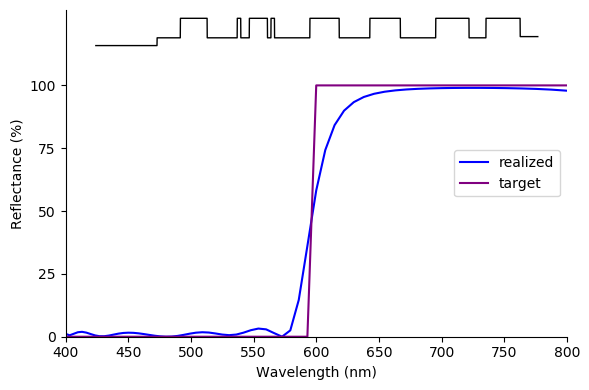

In [52]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import oldqx as oq
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import matplotlib as mpl
#mpl.rcParams['savefig.pad_inches'] = 0.05

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.reset()

lam_min = 400
lam_max = 800
num_layers = 16
num_lpoints = 64
#lams = np.linspace(lam_min, lam_max, endpoint=True, num=num_lpoints)
lam_inv = np.linspace(1/lam_min, 1/lam_max, num=64, endpoint=True)
lams = 1.0/lam_inv

#
# des = np.array([ 87.0,   13.5,  10.0,  100.0,   30.5,  16.,   20.,   10.,   25.,   11.5,  10.,  100.,
#   10.,   12.5,  32.5,  10. ])

des = np.array([ 66.,   76.,   85.,   10.,   24.,   51.5,  10.,   10.,  100.,   83.,   86.5,  86.5,
 100.,   94.,   48.,   96.5])
# des2 = np.array([ 66.,   86.,   65.,   10.,   44.,   51.5,  30.,   10.,  100.,   83.,   86.5,  86.5,
#  100.,   94.,   48.,   96.5])

Rs = 100*oq.tmm_eval_wsweep( des   ,0, lam_low=400, lam_high=800, lam_pts=64)
Rs2 = 100*oq.tmm_eval_wsweep( des2   ,0, lam_low=400, lam_high=800, lam_pts=64)
mean_tr = np.mean(Rs)*np.ones_like(Rs)
R_ref = Rs - Rs
R_ref[ np.logical_and(lams >=600, lams <= 900)] = 100

plt.plot(lams, Rs, 'b', linewidth=1.5, label='realized')
#plt.plot(lams, Rs2, 'red', linewidth=1.5, label='realized')
plt.plot(lams, R_ref, 'purple', linewidth=1.5, label='target')

plt.ylim([0,130])
plt.xlim([400,800])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.yticks([0, 25, 50, 75, 100], labels=[  '0','25','50','75', '100']);
#plt.text(410, 2.5, "[ 87, 13.5, 10, 100, 30.5, 16, 20, 10, 25, 11.5, 10, 100, 10, 12.5, 32.5, 10]")

inset_axes = inset_axes(ax, 
                    width="97%", # width = 30% of parent_bbox
                    height=0.3, # height : 1 inch
                    loc=1)

#xp, yp = give_n(final[36]) 
xp, yp = oq.give_n(0.01*des)

# #xp, yp = give_n(bests_ac)
plt.plot(xp, yp, 'k', linewidth = 1)
# plt.ylim([0.9, 3])
#inset_axes.get_xaxis().set_visible(False)
inset_axes.get_yaxis().set_visible(False)
inset_axes.axis('off')
inset_axes.spines['top'].set_visible(False)
inset_axes.spines['right'].set_visible(False)
inset_axes.spines['bottom'].set_visible(False)
inset_axes.spines['left'].set_visible(False)
ax.legend(loc=7)
plt.savefig('example.pdf')
plt.tight_layout()
# plt.show()

In [8]:
des

array([ 87. ,  13.5,  10. , 100. ,  30.5,  16. ,  20. ,  10. ,  25. ,
        11.5,  10. , 100. ,  10. ,  12.5,  32.5,  10. ])

In [27]:
np.sum(des)

1027.0